# 27. Object Detection : Object Localization

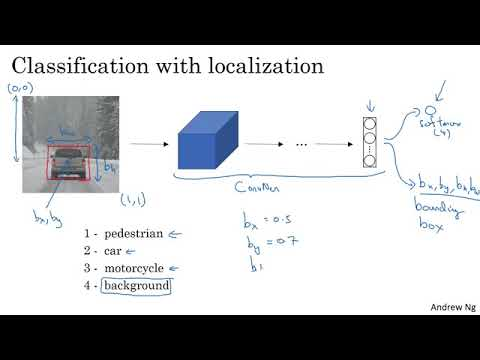

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('cz-ttO-cKNk')

Ojbect Detection을 구성하기 위해서는, 먼저 Object Localization을 배워야 합니다. 
Object Localization이 무엇을 의미하는 지 먼저 알아보도록 하겠습니다. 

![1](http://postfiles15.naver.net/MjAxODAyMjVfMTI3/MDAxNTE5NTQzODI1MTI1.h_Jo0YJM7BuBaAmVQxmx7cRHISmaLYyzBXwDekse2kgg.zpYQzW5LnntGSKMvWXMbakcNTkavq6iB0Tkw4P32Giog.PNG.infoefficien/CNN23._Object_Detection__Object_Localization.mp4_000032020.png?type=w773)

먼저 Image <span class="mark">Classification</span>은 앞에서 공부한 것과 같이 위 사진을 특정 알고리즘을 이용하여 Classification 하는 것이고 정답은 Car 라고 도출할 수 있습니다. 

![2](http://postfiles2.naver.net/MjAxODAyMjVfNzgg/MDAxNTE5NTQ0NDI0MTgz.D8JDJBcdSNxkdYvhYq11UMjLZMS2hHS-d3RvDsvaX_Ug.oc-tZKiSGn4_faEw2iDPiAZF4DkZHTUWpvWnKmvfPQkg.PNG.infoefficien/CNN23._Object_Detection__Object_Localization.mp4_000045527.png?type=w773)

<span class="mark">Classification with localization</span> 은 반면 Image classification과 bounding box를 통하여 object를 표시하는 것을 말합니다. 따라서 위 이미지에서 label은 car 라고 예측하고 car의 위치 까지 표시해야 합니다.

![3](http://postfiles2.naver.net/MjAxODAyMjVfNTAg/MDAxNTE5NTQ0ODIzMDE1.UYRIZ5KkdDUHuQd_EBtUFw5NUw1Ej1ryaA9TNHEcRNgg.2o-NrIZTiDXsPAzhYBZuEc143Ufjffg-gCcep66RAi8g.PNG.infoefficien/CNN23._Object_Detection__Object_Localization.mp4_000129447.png?type=w773)

그러면 <span class="mark">Detection은</span> 무엇일까요? 앞에서 본 Classification과 Localization은 1개의 Object를 Classification 및 Localization을 하는 알고리즘입니다. 반면 Detection은 Multiple Object를 Classification 및 Localization을 합니다. 

이번 강의에서는 최종 목표인 Detection을 하기 전에 Localization을 어떻게 하는지 알아보도록 하겠습니다. 

![4](http://postfiles4.naver.net/MjAxODAyMjVfMTk3/MDAxNTE5NTQ2ODc4NTkz.r8YraDJ1kmhvF7Gq7ucZ7HC58hDuDjjn9yIg3n5MPicg.uLgBku7G8vc3TG3laSIAfo7c5v2ICPMVgoK0hSfxirMg.PNG.infoefficien/CNN23._Object_Detection__Object_Localization.mp4_000164376.png?type=w773)

우리는 이미 Classification Problem은 익숙한 상태 입니다. Classification에서는 image를 multiple-layer ConvNet에 Feed 하고 마지막 layer에서 softmax를 적용한 output vector를 통하여 prediction 할 수 있었습니다. 

만약 Autonomous Driving Car를 설계한다면 예를 들어 위의 4가지 Classification이 필요할 수 있습니다.
1. Pedestrian
2. Car 
3. Motorcycle 
4. Background

여기서 Background는 1,2,3 Object가 없을 때 선택 됩니다. 

![5](http://postfiles4.naver.net/MjAxODAyMjZfMTI0/MDAxNTE5NjUzMTc5Mzcx.m3x4dU1PUg_KOOdSYB7dRM9OK0uUR3QknR-lgyjHXjQg.wesfpjEOLtfUqUZQgS6920akk0R0LEcLAQzeiunTSCEg.PNG.infoefficien/CNN23._Object_Detection__Object_Localization.mp4_000219146.png?type=w773)

만약 Classification에 Localization을 추가 한다면 어떻게 하면 될까요? Localization을 하려면 Neural Network의 구조를 바꿀 필요가 있습니다. 좀 더 많은 Output 이 필요하게 됩니다. 필요한 Output은 <span class="mark">Bounding Box의 좌표</span>와 연관된 데이터로 bx, by, bh, bw에 해당합니다. 이 4개의 좌표는 Detect된 물체에 Bounding Box를 그리기 위한 좌표 정보에 해당합니다. 

![6](http://postfiles1.naver.net/MjAxODAyMjhfMTI5/MDAxNTE5ODI1NTA1NzQ5._ggen4rn35kH_M21w7LyWo5QUOL_ctSAc9Oij4y7yZ8g.jZPuaQJqwEUpnsSypQ0nL5OgNAAED8d69BSzsSr6QTEg.PNG.infoefficien/image_8666613281519825413464.png?type=w773)

그리고 이 강의에서는 대상 이미지의 좌측 상단의 좌표를 (0, 0)으로 정하고 우측 하단의 좌표를 (1, 1)로 정하여 좌표를 계산합니다.

![7](http://postfiles9.naver.net/MjAxODAyMjhfNTEg/MDAxNTE5ODI1NzA2Nzgy.6hyCYIZh3lqNdId-7bbAap7RWA3SZMmfIrw3o-HjOjsg.hIBWvJC4tcrmmUOfes-RDm6AiDua_N8PW4rsgrmjJEEg.PNG.infoefficien/CNN23._Object_Detection__Object_Localization.mp4_000253929.png?type=w773)

앞에서 설명드린 bx, by, bh, bw는 위의 이미지를 기준으로 볼 때 빨간색 bounding box 를 나타냅니다. (by, bx)는 bounding box의 중점을 나타내고 bh와 bw 각각은 높이와 너비를 나타냅니다. <br>
따라서 Neural Network의 Training set가 class label 뿐만 아니라 bounding box 좌표 4개를 Training 시 받는다면 Supervised Learning 알고리즘을 통하여 Classification과 Localization을 수행할 수 있습니다. 

![8](http://postfiles11.naver.net/MjAxODAyMjhfMjk5/MDAxNTE5ODI2OTI1MTEw.B9Nn5ad5ex0_Cv6RawZZ-OkMj3T8ahVOJBWjbEpNrwQg.8VkjCLVSQW1oKh_WiTyihCIOjEmyHmpz1BWjNSIcpHkg.PNG.infoefficien/CNN23._Object_Detection__Object_Localization.mp4_000314762.png?type=w773)

예를 들어 자동차의 Bounding Box는 (bx, by, bh, bw) = (0.5, 0.7, 0.3, 0.4) 정도가 될 수 있습니다. by를 예를 들어 보면 y축의 좌표가 아래쪽에 있으므로 0.5보다 큰 값이 되는 것이 합당한 것으로 보입니다. 

![9](http://postfiles6.naver.net/MjAxODAyMjhfMTU4/MDAxNTE5ODI4MTA3NzEz.WHyDfj_2PWHE4o59O6cbejGul4EFZg5lBfnL9fQfuE8g.foP-w2bgWNv02UL491AFVo_n9LMrV0d8FiABJACg_yMg.PNG.infoefficien/CNN23._Object_Detection__Object_Localization.mp4_000421033.png?type=w773)

따라서 target label y는 class 값과 bounding box 값들로 구성이 되어야 합니다. 구체적으로 보면 위 예제를 기준으로[Pc, bx, by, bh, bw, c1, c2, c3]가 됩니다. <br>
- Pc (Probability of Class) : Class가 Object인가 아닌가? Pc = 1이면 Object는 존재하고 Pc = 0이면 Object는 background가 됩니다. <br>
- bx, by, bh, bw : bounding box 의 좌표<br>
- c1, c2, c3 : Class1(Pedestrian), Class2(Car), Class3(Motorcycle)<br>
우리가 현재 다루고 있는 문제는 Classification & Localization이고 여기서는 한 개의 이미지에 한 개의 Class가 있다고 가정하기 때문에 Class 중 오직 1개만 선택됩니다. 

![10](http://postfiles9.naver.net/MjAxODAzMDFfMTIz/MDAxNTE5ODM0NTU0MTg5.dGKDUXlMb4zNXhDNKXoPmM0eF6qW4m5Qw9Svz1ZbZJsg.1z4AiwXIsb1fVlnyxv7ZH9pXW9h3RazqXWxiUaPFe50g.PNG.infoefficien/CNN23._Object_Detection__Object_Localization.mp4_000519573.png?type=w773)

위에서 정의한 Target label y를 이용하여 예를 구성해 보겠습니다.<br>
첫번째로 위의 자동차가 있는 이미지를 input X로 받았을 때, y = [1, bx, by, bh, bw, 0, 1, 0]' 으로 구성할 수 있습니다. Class2에 해당하는 Object가 있기 때문에 Pc = 1이 되고 Class는 2번째 원소가 1이 되고 나머지 Class는 0이 됩니다. <br>
두번째로 Object가 없는 이미지를 이용하여 label을 구성하면 y = [0, ?, ?, ?, ?, ?, ?, ?]가 될 수 있습니다. 이미지에 Object가 없기 때문에 Pc = 0이 되고 나머지 원소는 어떤 값이 와도 의미가 없습니다.  <br>
이제 Training set을 구성할 때, 위와 같이 Input image X와 더불어 label을 어떻게 만들지에 대하여 알 수 있습니다.

![11](http://postfiles9.naver.net/MjAxODAzMDFfOTgg/MDAxNTE5ODM2NjU4Mjkw.VqnoNA-7_7e7NK_tYrJisl8uAy9KKQ7bo9wC5W6Iks8g.j9jrxrJBPFRZMbWhp7xvVQEx4GZHpzC5nQtj9VRd5tAg.PNG.infoefficien/CNN23._Object_Detection__Object_Localization.mp4_000614360.png?type=w773)

마지막으로 loss function을 정의해 보면 대표적으로 Squared Error를 이용할 수 있습니다. y와 $\hat{y}$이 있을 때, Squared를 이용하여 전체 loss를 구할 수 있습니다. 이 때 loss를 구하는 방식이 Pc값에 따라 다릅니다. label y에서 Pc는 첫 번째 원소이기 때문에 $y_{1}$이라고 표현하면<br>
- $y_{1}$ = 1일 때에는 모든 원소 즉, $y_{1}$ ~ $y_{8}$까지 Squared Error를 구합니다. <br>
- $y_{1}$ = 0일 때에는 Pc값 즉, $y_{1}$ 값만 필요하므로 오직 $y_{1}$ 원소에 한하여 Squared Errror를 구하면 됩니다. <br><br>
실제 사용할 때에는 loss function으로 Cross Entropy와 같은 log like feature를 사용할 수 있고 Squared Error를 사용하여도 무방합니다. Pc의 경우 0 / 1 두 가지 값 중 하나를 예측하는 것이므로 logistic regression을 사용하여도 됩니다. 
